1、导入所需库和包

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']

C:\Users\pc\AppData\Local\Temp\ipykernel_7036\3120348182.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


导入csv并查看

In [112]:
data = pd.read_csv(r'豆瓣影评1.csv', encoding='gbk')
data



,评论者,推荐力度,评论时间,评论内容
0,犀牛,力荐,\n2005-10-28 00:28:07\n,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
1,kingfish,力荐,\n 2006-03-22 12:38:09\n ...,不需要女主角的好电影
2,如小果,力荐,\n 2008-02-27 21:43:23\n ...,恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》
3,文泽尔,推荐,\n 2008-01-14 01:53:08\n ...,人的生命不过是从一个洞穴通往另一个世界..然后在那个世界的雨中继续颤抖.iphope
4,Eve|Classified,力荐,\n 2008-05-09 23:15:34\n ...,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...
...,...,...,...,...
586,一人独往,推荐,\n 2017-04-13 14:00:48\n ...,回顾那一段经典台词：“有的人的羽翼是如此光辉，即使世界上最黑暗的牢狱，也无法长久地将他围困！”
587,Germany,力荐,\n 2012-01-04 01:27:30\n ...,竟然忘了给这电影打分啊。。挺喜欢结局啊，所以四星啦。。大家不要盲目跟风啊。。
588,黑稻子,推荐,\n 2007-01-13 14:43:50\n ...,说实话，给我的震撼没有传说中那么强烈，但就电影来说，他做得已经足够多了
589,Icarus,力荐,\n 2009-08-20 18:01:19\n ...,这片子一定得经历了些东西才能看懂，千人眼中有千个哈姆雷特不是么安迪至少救赎了2个人倒是不错的


进行数据清洗

In [113]:
#清除评论时间的格式换行符
data['评论时间']=data['评论时间'].str.replace('\n','')
data
#评论时间格式转换
data.loc[:, '评论时间'] = pd.to_datetime(data.loc[:, '评论时间'])  #转化为带-的时间


,评论者,推荐力度,评论时间,评论内容
0,犀牛,力荐,2005-10-28 00:28:07,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
1,kingfish,力荐,2006-03-22 12:38:09 ...,不需要女主角的好电影
2,如小果,力荐,2008-02-27 21:43:23 ...,恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》
3,文泽尔,推荐,2008-01-14 01:53:08 ...,人的生命不过是从一个洞穴通往另一个世界..然后在那个世界的雨中继续颤抖.iphope
4,Eve|Classified,力荐,2008-05-09 23:15:34 ...,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...
...,...,...,...,...
586,一人独往,推荐,2017-04-13 14:00:48 ...,回顾那一段经典台词：“有的人的羽翼是如此光辉，即使世界上最黑暗的牢狱，也无法长久地将他围困！”
587,Germany,力荐,2012-01-04 01:27:30 ...,竟然忘了给这电影打分啊。。挺喜欢结局啊，所以四星啦。。大家不要盲目跟风啊。。
588,黑稻子,推荐,2007-01-13 14:43:50 ...,说实话，给我的震撼没有传说中那么强烈，但就电影来说，他做得已经足够多了
589,Icarus,力荐,2009-08-20 18:01:19 ...,这片子一定得经历了些东西才能看懂，千人眼中有千个哈姆雷特不是么安迪至少救赎了2个人倒是不错的


C:\Users\pc\AppData\Local\Temp\ipykernel_7036\3788449938.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, '评论时间'] = pd.to_datetime(data.loc[:, '评论时间'])  #转化为带-的时间


In [114]:
#按照日期降序排序
data_new = data.sort_values('评论时间', na_position='first',ascending=False)  #na_position='first'将缺失值放在前面
data_new  #查看是否排序成功

,评论者,推荐力度,评论时间,评论内容
354,Odair,力荐,2023-04-28 21:42:17,2023年北影节最后一部观影，结束在这部豆瓣电影永远的Top 1。它的经典早已无需我来赘述。...
325,李 直气壮.,推荐,2023-04-26 18:26:53,所谓影史第一，又有多少马太效应的复利？自由谁不向往？但多少人是真正的能有感悟？多少人“为赋新...
528,PSG粉保护协会,力荐,2023-04-24 21:08:41,90/100这是一个独特的切面，这是一部很美国的片，逼真地展示了监狱生活和其下的人物，情节则...
321,看电影延长生命,力荐,2023-03-27 21:38:11,无论何种机遇，都不要放弃。请你务必，一而再再而三，三而不竭，千次万次毫不犹豫的救自己于这世间水火
441,豆友151603068,力荐,2023-03-24 21:55:07,知识改变命运，永远保持希望，对自由的渴望，对他人的善良
...,...,...,...,...
51,毛驴哥????,力荐,2005-12-26 22:57:17,不多说了
0,犀牛,力荐,2005-10-28 00:28:07,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
416,空陽光,还行,2005-10-24 18:09:44,在下載《肖申尅的救贖》的時候，我一直在想“太晚了，太晚了”。因为光听到这个名字已经若干年了，...
16,私享史,力荐,2005-10-08 14:35:04,因为1994年台湾引进了一部比较卖座的老片The Sting，被错译成了《刺激》。到了199...


In [115]:
#提取评论年月
data_new['year'] = data_new['评论时间'].dt.year  # 提取年份
data_new['month'] = data_new['评论时间'].dt.month  # 提取月份
data_new  #查看是否提取成功

,评论者,推荐力度,评论时间,评论内容,year,month
354,Odair,力荐,2023-04-28 21:42:17,2023年北影节最后一部观影，结束在这部豆瓣电影永远的Top 1。它的经典早已无需我来赘述。...,2023,4
325,李 直气壮.,推荐,2023-04-26 18:26:53,所谓影史第一，又有多少马太效应的复利？自由谁不向往？但多少人是真正的能有感悟？多少人“为赋新...,2023,4
528,PSG粉保护协会,力荐,2023-04-24 21:08:41,90/100这是一个独特的切面，这是一部很美国的片，逼真地展示了监狱生活和其下的人物，情节则...,2023,4
321,看电影延长生命,力荐,2023-03-27 21:38:11,无论何种机遇，都不要放弃。请你务必，一而再再而三，三而不竭，千次万次毫不犹豫的救自己于这世间水火,2023,3
441,豆友151603068,力荐,2023-03-24 21:55:07,知识改变命运，永远保持希望，对自由的渴望，对他人的善良,2023,3
...,...,...,...,...,...,...
51,毛驴哥????,力荐,2005-12-26 22:57:17,不多说了,2005,12
0,犀牛,力荐,2005-10-28 00:28:07,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005,10
416,空陽光,还行,2005-10-24 18:09:44,在下載《肖申尅的救贖》的時候，我一直在想“太晚了，太晚了”。因为光听到这个名字已经若干年了，...,2005,10
16,私享史,力荐,2005-10-08 14:35:04,因为1994年台湾引进了一部比较卖座的老片The Sting，被错译成了《刺激》。到了199...,2005,10


In [116]:
#删除缺省值
data_new.dropna(axis=0,how='any',inplace=True)#删除缺失值，axis=0表示删除行，how='any'表示只要有缺失值就删除
data_new

,评论者,推荐力度,评论时间,评论内容,year,month
354,Odair,力荐,2023-04-28 21:42:17,2023年北影节最后一部观影，结束在这部豆瓣电影永远的Top 1。它的经典早已无需我来赘述。...,2023,4
325,李 直气壮.,推荐,2023-04-26 18:26:53,所谓影史第一，又有多少马太效应的复利？自由谁不向往？但多少人是真正的能有感悟？多少人“为赋新...,2023,4
528,PSG粉保护协会,力荐,2023-04-24 21:08:41,90/100这是一个独特的切面，这是一部很美国的片，逼真地展示了监狱生活和其下的人物，情节则...,2023,4
321,看电影延长生命,力荐,2023-03-27 21:38:11,无论何种机遇，都不要放弃。请你务必，一而再再而三，三而不竭，千次万次毫不犹豫的救自己于这世间水火,2023,3
441,豆友151603068,力荐,2023-03-24 21:55:07,知识改变命运，永远保持希望，对自由的渴望，对他人的善良,2023,3
...,...,...,...,...,...,...
51,毛驴哥????,力荐,2005-12-26 22:57:17,不多说了,2005,12
0,犀牛,力荐,2005-10-28 00:28:07,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005,10
416,空陽光,还行,2005-10-24 18:09:44,在下載《肖申尅的救贖》的時候，我一直在想“太晚了，太晚了”。因为光听到这个名字已经若干年了，...,2005,10
16,私享史,力荐,2005-10-08 14:35:04,因为1994年台湾引进了一部比较卖座的老片The Sting，被错译成了《刺激》。到了199...,2005,10


In [117]:
#删除不正常的评论
# 使用正则表达式匹配是否包含中文字体
import re
pattern = re.compile(r'[\u4e00-\u9fff]')  # 匹配中文字符范围
data_new = data_new[data_new['评论内容'].str.contains(pattern)]
data_new

,评论者,推荐力度,评论时间,评论内容,year,month
354,Odair,力荐,2023-04-28 21:42:17,2023年北影节最后一部观影，结束在这部豆瓣电影永远的Top 1。它的经典早已无需我来赘述。...,2023,4
325,李 直气壮.,推荐,2023-04-26 18:26:53,所谓影史第一，又有多少马太效应的复利？自由谁不向往？但多少人是真正的能有感悟？多少人“为赋新...,2023,4
528,PSG粉保护协会,力荐,2023-04-24 21:08:41,90/100这是一个独特的切面，这是一部很美国的片，逼真地展示了监狱生活和其下的人物，情节则...,2023,4
321,看电影延长生命,力荐,2023-03-27 21:38:11,无论何种机遇，都不要放弃。请你务必，一而再再而三，三而不竭，千次万次毫不犹豫的救自己于这世间水火,2023,3
441,豆友151603068,力荐,2023-03-24 21:55:07,知识改变命运，永远保持希望，对自由的渴望，对他人的善良,2023,3
...,...,...,...,...,...,...
8,寂地,力荐,2006-01-02 23:57:15,"超级喜欢超级喜欢,不看的话人生不圆满.",2006,1
51,毛驴哥????,力荐,2005-12-26 22:57:17,不多说了,2005,12
0,犀牛,力荐,2005-10-28 00:28:07,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005,10
416,空陽光,还行,2005-10-24 18:09:44,在下載《肖申尅的救贖》的時候，我一直在想“太晚了，太晚了”。因为光听到这个名字已经若干年了，...,2005,10


统计推荐力度中的各种类型的占比，并用bar柱状图显示

([<matplotlib.patches.Wedge at 0x20817dd5590>,
 [Text(-0.6527153638517192, 0.8854166554746516, '力荐'),
  Text(0.3795366449898403, -1.0324494830788846, '推荐'),
  Text(1.0062733079480688, -0.4443129862059528, '还行'),
  Text(1.0824196627270353, -0.19587667993380742, '较差'),
  Text(1.0988262785166438, -0.05080166967003301, '很差')],
 [Text(-0.3560265621009377, 0.4829545393498099, '70.2%'),
  Text(0.2070199881762765, -0.5631542634975734, '20.8%'),
  Text(0.5488763497898557, -0.24235253793051964, '4.8%'),
  Text(0.5904107251238374, -0.1068418254184404, '2.8%'),
  Text(0.5993597882818057, -0.02771000163819982, '1.5%')])

Text(0.5, 1.0, '推荐力度占比')

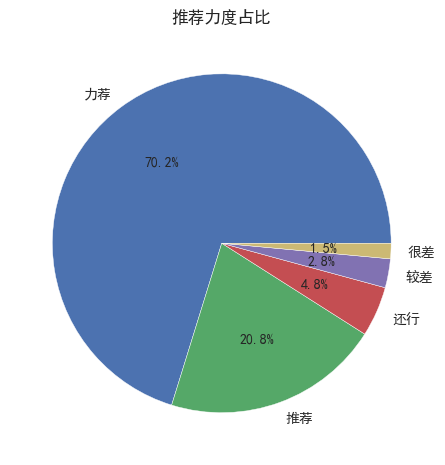

In [118]:


# 统计推荐力度数量
recommendation_counts = data_new['推荐力度'].value_counts()

# 提取推荐力度和对应的数量
recommendation_labels = recommendation_counts.index.tolist()
recommendation_values = recommendation_counts.values.tolist()

# 绘制饼图
plt.pie(recommendation_values, labels=recommendation_labels, autopct='%1.1f%%')

# 添加标题
plt.title('推荐力度占比')

# 显示图形
plt.show()


分析：

提取推荐内容的关键词，并计算出现频率最高的十个关键词

[('电影', 242), ('希望', 189), ('自由', 158), ('没有', 94), ('一个', 89), ('这部', 87), ('经典', 87), ('自己', 85), ('救赎', 85), ('监狱', 73), ('就是', 73), ('安迪', 70), ('我们', 67), ('时候', 66), ('一部', 54), ('体制', 52), ('最后', 50), ('片子', 49), ('真的', 49), ('不是', 48), ('还是', 48), ('肖申克', 47), ('什么', 45), ('生活', 44), ('觉得', 43), ('这个', 43), ('但是', 41), ('人生', 40), ('因为', 40), ('可以', 39), ('喜欢', 38), ('越狱', 38), ('影片', 36), ('美好', 35), ('东西', 35), ('知道', 34), ('故事', 34), ('一种', 34), ('其实', 33), ('无法', 32), ('可能', 32), ('励志', 30), ('看过', 30), ('看到', 30), ('震撼', 29), ('一直', 29), ('所以', 28), ('他们', 27), ('坚持', 27), ('已经', 25), ('那么', 25), ('信念', 25), ('放弃', 24), ('一切', 24), ('这样', 24), ('很多', 24), ('第一', 23), ('总是', 23), ('一样', 23), ('永远', 22), ('要么', 22), ('世界', 22), ('时间', 22), ('现在', 22), ('值得', 22), ('选择', 21), ('结局', 21), ('社会', 21), ('只是', 21), ('习惯', 21), ('也许', 21), ('美国', 20), ('梦想', 20), ('感觉', 20), ('精神', 20), ('如果', 20), ('人性', 20), ('这是', 19), ('开始', 19), ('出狱', 19), ('还有', 19), ('即使', 19), ('为什么', 19)

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x20817deb910>,
 [Text(0, 0, '电影'),
  Text(1, 0, '希望'),
  Text(2, 0, '自由'),
  Text(3, 0, '没有'),
  Text(4, 0, '一个'),
  Text(5, 0, '这部'),
  Text(6, 0, '经典'),
  Text(7, 0, '自己'),
  Text(8, 0, '救赎'),
  Text(9, 0, '监狱')])

Text(0.5, 0, '关键词')

Text(0, 0.5, '频率')

Text(0.5, 1.0, '关键词频率最高的十个关键词')

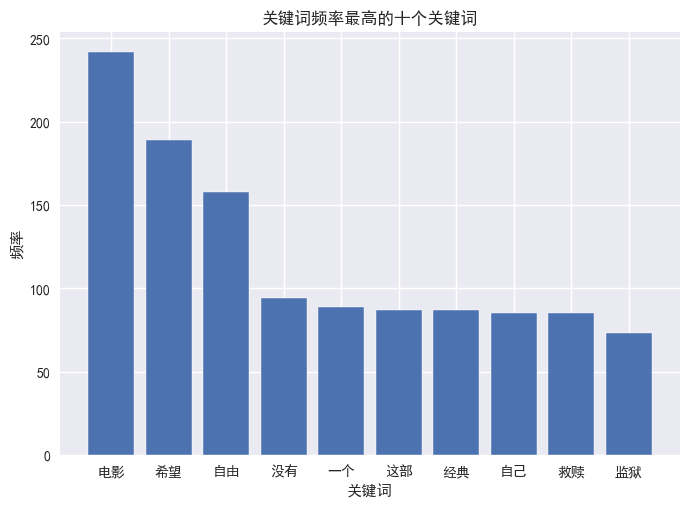

In [119]:
import pandas as pd
import jieba
from collections import defaultdict
import matplotlib.pyplot as plt


# 提取推荐内容的列
comments = data_new['评论内容'].tolist()

# 分词
words = []
for comment in comments:
    words += jieba.lcut(comment)

# 统计关键词频率
word_freq = defaultdict(int)
for word in words:
    # 过滤长度太短的关键词和特定符号
    if len(word) > 1 and word not in ['，', '。', '！', '？']:
        word_freq[word] += 1
    elif len(word) > 2 and word not in ['，', '。', '！', '？']:
        word_freq[word] += 1
# print(word_freq)
word_freq1=sorted(word_freq.items(),key=lambda x:x[1],reverse=True)
print(word_freq1)
# 获取频率最高的十个关键词
top_words = sorted(word_freq, key=word_freq.get, reverse=True)[:10]
# print(top_words)

# 绘制条形图展示关键词频率
plt.bar(range(len(top_words)), [word_freq[word] for word in top_words])
plt.xticks(range(len(top_words)), top_words)
plt.xlabel('关键词')
plt.ylabel('频率')
plt.title('关键词频率最高的十个关键词')
# plt.show()


分析：

In [120]:
#画词云图

每段时间的评论数量,用柱状图展示

C:\Users\pc\AppData\Local\Temp\ipykernel_7036\2908970797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['评论时间'] = pd.to_datetime(data_new['评论时间'])
C:\Users\pc\AppData\Local\Temp\ipykernel_7036\2908970797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['年份'] = data_new['评论时间'].dt.year


<BarContainer object of 19 artists>

Text(0.5, 1.0, '每年评论数量')

Text(0.5, 0, '年份')

Text(0, 0.5, '评论数量')

([<matplotlib.axis.XTick at 0x20817dbe350>,
 [Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

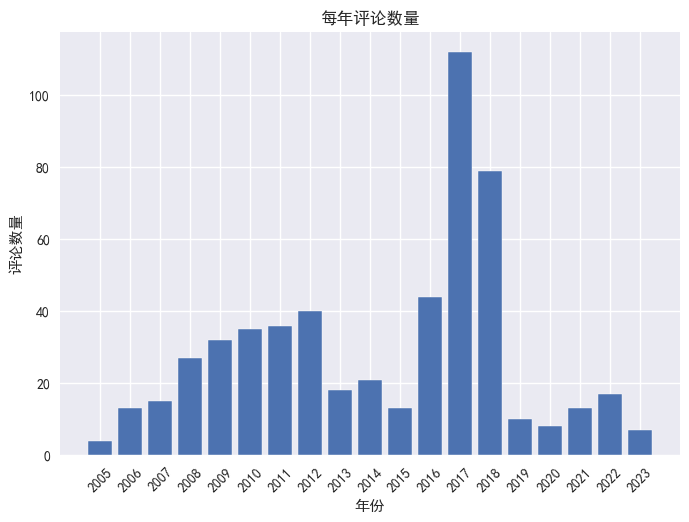

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


# 处理评论时间，提取年份
data_new['评论时间'] = pd.to_datetime(data_new['评论时间'])
data_new['年份'] = data_new['评论时间'].dt.year

# 统计每年的评论数量
yearly_comment_counts = data_new['年份'].value_counts().sort_index()

# 绘制柱状图
plt.bar(yearly_comment_counts.index, yearly_comment_counts.values)

# 添加标题和标签
plt.title('每年评论数量')
plt.xlabel('年份')
plt.ylabel('评论数量')

# 设置 x 轴标签为整数
plt.xticks(yearly_comment_counts.index, rotation=45)

# 显示图形
plt.show()


分析：

评论时间趋势

Text(0.5, 1.0, '评论数量时间趋势')

Text(0.5, 0, '时间')

Text(0, 0.5, '评论数量')

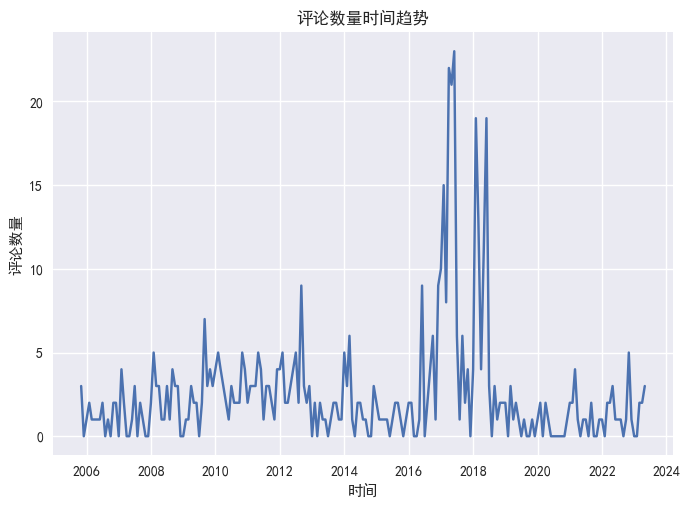

In [122]:
import pandas as pd
import matplotlib.pyplot as plt


# 提取评论时间的列
comment_time = pd.to_datetime(data_new['评论时间'])

# 设置索引为评论时间列
data_new.set_index(comment_time, inplace=True)

# 按月份统计评论数量
monthly_counts = data_new.resample('M').size()

# 绘制时间趋势图
plt.plot(monthly_counts)
plt.title('评论数量时间趋势')
plt.xlabel('时间')
plt.ylabel('评论数量')
plt.show()


分析：从图中可以看出，评论数量在2017年8月份达到最高峰，之后逐渐下降，2018年8月份达到最低点，之后逐渐上升，2019年8月份达到最高峰，之后逐渐下降，2020年8月份达到最低点，之后逐渐上升。说明该电影的评论数量在每年的8月份达到最高峰，之后逐渐下降，每年的8月份达到最低点，之后逐渐上升。

分析评论内容的长度和推荐力度的关系

In [123]:
# 评论长度与推荐力度的关系-柱状图

推荐力度
力荐    76.465969
很差    73.500000
推荐    61.920354
较差    38.666667
还行    85.615385
Name: 评论内容长度, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_7036\3509379077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['评论内容长度'] = data_new['评论内容'].str.len()


<BarContainer object of 5 artists>

Text(0.5, 1.0, '评论内容长度和推荐力度关系')

Text(0.5, 0, '推荐力度')

Text(0, 0.5, '平均评论内容长度')

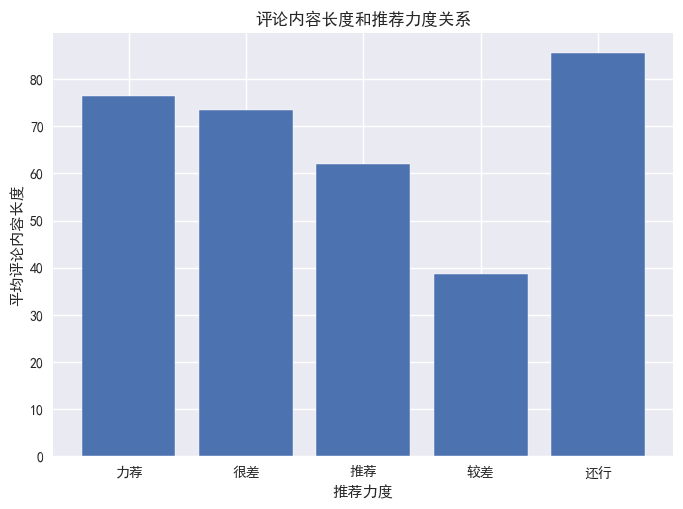

In [124]:
# 计算评论内容长度
data_new['评论内容长度'] = data_new['评论内容'].str.len()
# 按照推荐力度进行分组并计算平均值
grouped = data_new.groupby('推荐力度')['评论内容长度'].mean()#mean()函数是求平均值
print(grouped)
# 绘制柱状图
plt.bar(grouped.index, grouped.values)
# 添加标题和标签
plt.title('评论内容长度和推荐力度关系')
plt.xlabel('推荐力度')
plt.ylabel('平均评论内容长度')
# 显示图形
plt.show()


分析：通过上述柱状图可以看出，推荐力度为力荐的评论内容长度最长，推荐力度为较差的评论内容长度最短。我们可以发现并不是评论内容越长，推荐力度越高，也不存在评论内容越短，推荐力度越低的情况。我们可以这样认为：当一个用户在评价电影的时候，如果他推荐力度为还行，说明他对这个电影的的赞许一般，相对于推荐力度很强的用户，这些群体还存在不满意的地方，所以他会写很多的评论内容，同时来表达他对这部电影的赞许和不满意的地方，如果他推荐力度很差，说明他对这个电影的赞许度很低，有很多不满意的地方，所以他会写很多的评论内容来表达他的不满意。

评论长度与推荐力度的关系-散点图

C:\Users\pc\AppData\Local\Temp\ipykernel_7036\2617064775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['评论长度'] = data_new['评论内容'].apply(lambda x: len(x))


Text(0.5, 1.0, '评论长度与推荐力度的关系')

Text(0.5, 0, '评论长度')

Text(0, 0.5, '推荐力度')

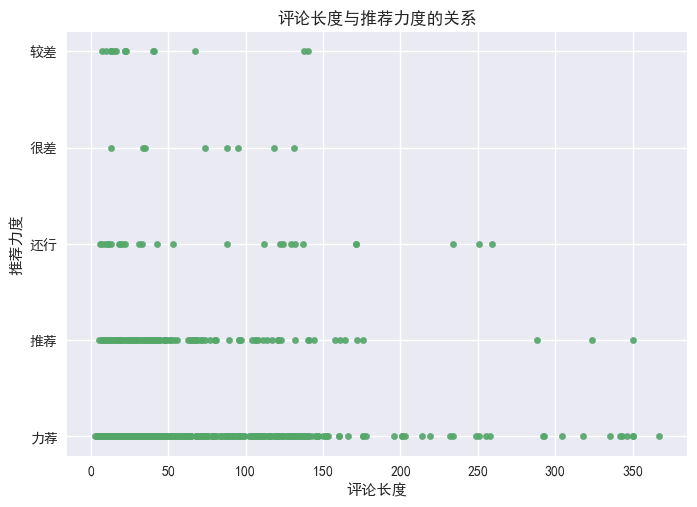

In [125]:
# 获取评论长度
data_new['评论长度'] = data_new['评论内容'].apply(lambda x: len(x))

# 绘制散点图
plt.scatter(data_new['评论长度'], data_new['推荐力度'],s=20, alpha=0.2)
plt.scatter(data_new['评论长度'], data_new['推荐力度'],s=20, alpha=0.9)

# 添加标题和轴标签
plt.title('评论长度与推荐力度的关系')
plt.xlabel('评论长度')
plt.ylabel('推荐力度')


# 显示图形
plt.show()


分析：通过散点图我们可以直观的看到力荐的评论是最多的，而且评论长度分布广泛，相同的是，当用户的推荐力度较强时，评论长度分布范围较为广泛相比之下，我们观察到评论

分析上图：从图中可以看出，推荐力度为力荐的评论内容长度最长，推荐力度为较差的评论内容长度最短。

分析用户评论时间段分布

<BarContainer object of 24 artists>

Text(0.5, 1.0, '用户评论时间分布')

Text(0.5, 0, '小时')

Text(0, 0.5, '评论数量')

([<matplotlib.axis.XTick at 0x20817f73e50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

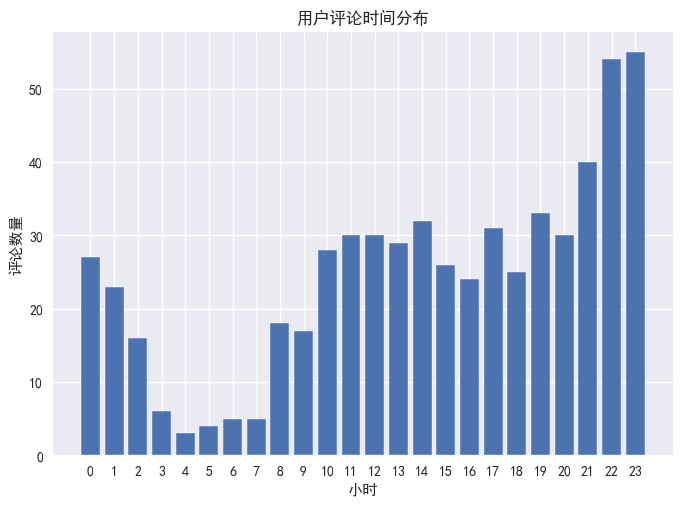

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载CSV文件
df = pd.read_csv('豆瓣影评.csv',encoding='gbk')

# 将评论时间列转换为日期时间格式
df['评论时间'] = pd.to_datetime(df['评论时间'])

# 提取小时信息
df['评论小时'] = df['评论时间'].dt.hour

# 统计每个小时的评论数量
hourly_counts = df['评论小时'].value_counts().sort_index()

# 绘制柱状图
plt.bar(hourly_counts.index, hourly_counts.values)

# 添加标题和标签
plt.title('用户评论时间分布')
plt.xlabel('小时')
plt.ylabel('评论数量')

# 设置x轴标签显示范围
plt.xticks(hourly_counts.index)

# 显示图形
plt.show()


分析：可以得出结论，用户评论时间主要集中在晚上